In [14]:
from merit import solve_problem
from helpers import swiss_nsf, plot_intervals, systematic_sampling
from generate_intervals import load_swiss_nsf

We consider methods for random selection or proposals that start with *interval estimates* of the quality of each proposal (e.g., the min and max review score given to each proposal in peer review or confidence intervals from a model estimated on review scores).

 In the example in this notebook, we will start with intervals generated using the Swiss NSF's method (described in their work [here](https://arxiv.org/abs/2102.09958)). We have already run their estimation procedure and saved intervals in this directory, so we just need to load the intervals. To run MERIT on your own data, replace intervals with a list of intervals estimating the quality of each item to be selected.  

In [4]:
x, intervals,_,_,_ = load_swiss_nsf()

In [11]:
x[:5], intervals[:5]

([349.571625, 348.8025, 347.958625, 347.946625, 347.601125],
 [(348.0, 352.0),
  (347.0, 351.0),
  (346.0, 351.0),
  (346.0, 351.0),
  (346.0, 351.0)])

Below, we plot the top 50 proposals based on their point estimates ($x$). Note that higher values correspond to higher "quality" so stronger candidates are those with higher scores. 

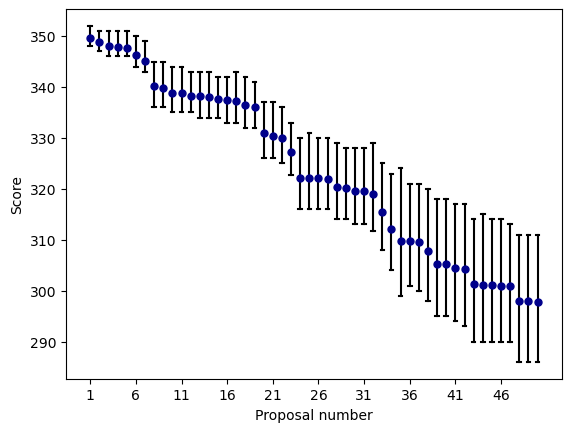

In [26]:
ax = plot_intervals(intervals[:50], x=x[:50])

We will choose $k=100$ out of $353$ intervals using MERIT. First, we use the `solve_problem` function to obtain the probability of selecting each proposal. The function takes as input the intervals and number of proposals to select. The function returns a vector of probabilities of selecting each proposal, the objective value of the robust optimization problem, and debugging information.

In [12]:
k = 100
p_merit, v_merit, info = solve_problem(intervals, k)

In [ ]:
# Vector of probabilities of selecting each proposal using MERIT selection mechanism
p_merit

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

Now, to actually select $k=100$ proposals, we call `systematic_sampling` using the probabilities obtained above. This function returns a list of $k$ indices of the selected proposals.

In [ ]:
# Select k proposals using systematic sampling based on the probabilities
selected = systematic_sampling(k, p_merit)
selected[:10], len(selected)

([25, 35, 20, 38, 48, 36, 52, 95, 29, 44], 100)

We can also compare the MERIT selection mechanism to selection using the Swiss NSF's approach (which sets a threshold as the k-th highest point estimate.) The Swiss NSF algorithm requires both intervals and point estimates of quality (given by $x$).

In [ ]:
p_swiss = swiss_nsf(intervals, x, k)

In [ ]:
# Vector of probabilities of selecting each proposal using Swiss NSF selection mechanism
p_swiss

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


Below, we compare the selection probabilities under MERIT and the Swiss NSF method. 12 proposals have a higher chance of selection under the Swiss NSF method than MERIT and 9 have a lower change of selection.

In [24]:
diff = p_swiss - p_merit
len(diff[diff > 0]), len(diff[diff < 0]), (diff[diff != 0])

(12,
 9,
 array([-0.10197368, -0.10197368, -0.10197368, -0.10197368,  0.16118421,
         0.16118421,  0.16118421,  0.16118421,  0.16118421,  0.16118421,
         0.16118421,  0.16118421,  0.16118421,  0.16118421,  0.16118421,
         0.16118421, -0.30526316, -0.30526316, -0.30526316, -0.30526316,
        -0.30526316]))